<a href="https://colab.research.google.com/github/thaisrezendeb/ufes_machineLearning/blob/main/Exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte II – Regressão Linear

**4) Para a base de dados Air Quality (disponibilizada em
http://archive.ics.uci.edu/ml/datasets/Air+Quality) divida ela em duas partes: 8000 amostras para treino e o resto para teste. Faça:**

**a) O tratamento dos valores faltantes na base de dados usando como informação os dados de treinamento. Explique os procedimentos utilizados.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

air_quality_raw = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")#, index_col=["Date"])
#Remoção de linhas e colunas vazias
air_quality_raw = air_quality_raw.iloc[:9357,:15]

nan_value = float("NaN")
air_quality_raw.replace(-200, nan_value, inplace=True)

air_train = air_quality_raw.iloc[:8000]

#Substituição dos valores faltantes pelas médias da base de treinamento
air_quality = air_quality_raw.fillna(air_train.mean(skipna=True))

idx = air_quality.columns

air_train = air_quality.iloc[:8000]
air_test = air_quality.iloc[8000:]

O método para corrigir os valores faltantes foi substituí-los pela média encontrada nas amostras de teste.

**b) Sobre os dados de treinamento, faça uma análise gráfica da relação entre a variável Absolute Humidity e as demais variáveis. Calcule o coeficiente de correlação de Kendall sobre as amostras que não possuem valores faltantes. Mostre os gráficos e análise os resultados dos coeficientes de correlação.**

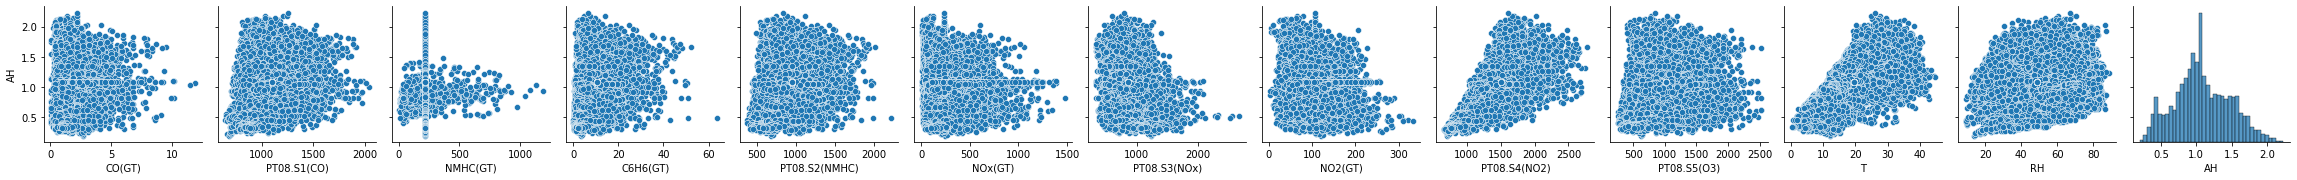

In [ ]:
sns.pairplot(air_train, y_vars=['AH'])

In [ ]:
#Cálculo da correlação de Kendall 
def kendall(x: np.array, y: np.array):

  nx = 0
  ny = 0
  sum = 0

  for i in range(1, x.size):
    for j in range(0, i):
      if x[i] < x[j]:
        sgn_x = 1;
      elif x[i] > x[j]:
        sgn_x = -1
      else:
        sgn_x = 0

      if y[i] < y[j]:
        sgn_y = 1;
      elif y[i] > y[j]:
        sgn_y = -1
      else:
        sgn_y = 0

      sum = sum + (sgn_x * sgn_y)
      
      if sgn_x != 0:
        nx = nx + 1
      
      if sgn_y != 0:
        ny = ny + 1
    
  tau = sum / (np.sqrt(nx) * np.sqrt(ny))

  return tau

In [ ]:
#Uso apenas de amostras sem valores faltantes
air_train_nn = air_quality_raw.dropna()
air_train_nn.reset_index(inplace=True)

#Verificação de dependência nula
z = 1.96 #para alfa = 0.05
n = air_train_nn.shape[0] #número de amostras para análise de dependência

dep = z * np.sqrt((2*(2*n+5))/(9*n*(n-1)))
print("Dep: {:.6f}\n".format(dep))

for i in range(0,14):
  t = kendall(air_train_nn.iloc[:n,14], air_train_nn.iloc[:n,i])
#  print("")
  print("Tau {} = {:.6f}".format(idx[i], t))

#  if (abs(t) > dep):
#    print("Hipótese nula rejeitada e pode haver dependência entre {} e {}".format(idx[14], idx[i]))
#  else:
#    print("Hipótese nula comprovada entre {} e {}".format(idx[14], idx[i]))

Dep: 0.045533

Tau Date = -0.055943
Tau Time = -0.081761
Tau CO(GT) = -0.182507
Tau PT08.S1(CO) = -0.105706
Tau NMHC(GT) = -0.033027
Tau C6H6(GT) = -0.155319
Tau PT08.S2(NMHC) = -0.141308
Tau NOx(GT) = -0.140810
Tau PT08.S3(NOx) = -0.054385
Tau NO2(GT) = 0.060481
Tau PT08.S4(NO2) = -0.152836
Tau PT08.S5(O3) = -0.010837
Tau T = -0.004429
Tau RH = -0.585037


Dos coeficientes de correlação calculados, percebe-se que nenhum apresenta forte tendência tanto no mesmo sentido quanto em sentido contrário. O maior coeficiente foi obtido para **RH**, em sentido oposto. Conclui-se que **RH** e **AH** têm relativa tendência a caminharem em sentidos opostos.

In [ ]:
#Código para teste
#x = [-0.4326, -1.6656, 0.1253, 0.2877, -1.1465, 1.1909, 1.1892, -0.0376, 0.3273, 0.1746, -0.1867, 0.7258, -0.5883, 2.1832, -0.1364]
#y = [-0.1898, 0.3105, 0.0783, -1.2667, -0.7478, 1.1433, 1.6583, -0.018, 3.6235, -0.0826, -1.5764, 2.6174, -4.2476, 2.1379, -0.4186]

#z = 1.96
#n = 15
#dep = z * np.sqrt((2*(2*n+5))/(9*n*(n-1)))
#t = kendall(np.array(x), np.array(y))
#print("Tau =", t, "\nDep = ", dep)

#if (abs(t) > dep):
#  print("Hipótese nula rejeitada e pode haver dependência entre x e y")
#else:
#  print("Hipótese nula comprovada entre x e y")

In [ ]:
#Código para teste
#import scipy.stats as stats

#x = [-0.4326, -1.6656, 0.1253, 0.2877, -1.1465, 1.1909, 1.1892, -0.0376, 0.3273, 0.1746, -0.1867, 0.7258, -0.5883, 2.1832, -0.1364]
#y = [-0.1898, 0.3105, 0.0783, -1.2667, -0.7478, 1.1433, 1.6583, -0.018, 3.6235, -0.0826, -1.5764, 2.6174, -4.2476, 2.1379, -0.4186]

#tau, p_value = stats.kendalltau(x, y)
#print(tau)
#print(p_value)

**c) Encontre um modelo polinomial para estimar os valores de Absolute Humidity usando para isto os dados de treinamento. Use os fatores de determinação de
complexidade QME e R2 dos modelos para auxiliar a encontrar o modelo. Varie de um modelo de primeiro grau até um modelo de terceiro grau (mostre os resultados obtidos de QME e R2 de cada modelo). Obtenha os valores RMSE e MAPE do modelo obtido sobre os dados de treino e teste. Mostre um gráfico com o novo modelo. O modelo conseguiu se ajustar aos dados? Por que?**

In [ ]:
def rmse(base_test, w):
  sum_err = 0

  for i,row in base_test.iterrows():
    fx = w[0]
    for j in range(1, w.size):
      fx = fx + (row[j-1] * w[j])
      
    sum_err = sum_err + np.power(row[-1]-fx, 2)

  rmse = np.sqrt(sum_err / base_test.shape[0])

  return rmse

def mape(base_test, w):
  sum_err = 0

  for i,row in base_test.iterrows():
    fx = w[0]
    for j in range(1, w.size):
      fx = fx + (row[j-1] * w[j])
  
    sum_err = sum_err + np.abs((row[-1]-fx)/row[-1])

    mape = sum_err / base_test.shape[0]
    
  return mape

def qme(base_test, w):
  sum_err = 0

  for i,row in base_test.iterrows():
    fx = w[0]
    for j in range(1, w.size):
      fx = fx + (row[j-1] * w[j])
  
    sum_err = sum_err + np.power(row[-1]-fx,2)

  qme = sum_err / (base_test.shape[0] - w.size)

  return qme

def r2(base_test, w):
  sum_err = 0
  sum_tk = 0
  medias = base_test.mean()
  
  for i,row in base_test.iterrows():
    fx = w[0]
    for j in range(1, w.size):
      fx = fx + (row[j-1] * w[j])

    sum_err = sum_err + np.power(row[-1]-fx,2)
    sum_tk = sum_tk + np.power((row[-1]-medias[-1]),2)

  r2 = 1 - (sum_err/sum_tk)

  return r2

In [ ]:
#######################################
#Modelo de polinomial de primeira ordem
#######################################

#Remove colunas de data, hora e AH
air_train1 = air_train.iloc[:,2:-1]
x0 = pd.DataFrame(np.array(np.ones((air_train.shape[0],1))))

x = pd.concat([x0, air_train1], axis=1)
t = air_train.iloc[:,-1]

#Matriz de coeficientes w
w1 = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x.T, x))), x.T), t)
print("Coeficientes:", w1, "\n")

#Conjunto de teste
air_test1 = air_test.iloc[:,2:]

#Calcula pontos do modelo 
fx1 = pd.DataFrame(index=air_test1.index, columns=['fx'])
for i,row in air_test1.iterrows():
    fx = w1[0]
    for j in range(1, w1.size):
      fx = fx + (row[j-1] * w1[j])
      fx1.loc[i] = fx 

qme1 = qme(air_test1, w1)
print("QME primeira ordem: {}".format(qme1))

r2_1 = r2(air_test1, w1)
print("R2 primeira ordem: {}".format(r2_1))

Coeficientes: [ 3.36504650e-01 -1.07024941e-02 -1.35087316e-04 -2.00204885e-05
  1.90275879e-02 -1.22873141e-03  1.76903310e-04 -4.37150632e-04
 -7.70657593e-04  4.13959279e-04  8.70574620e-05  4.29973869e-02
  1.54258393e-02] 

QME primeira ordem: 0.018608173010586825
R2 primeira ordem: 0.7585146724228796


In [ ]:
###################################
#Modelo polinomial de segunda ordem
###################################

# Preparação do conjunto de treinamento
#--------------------------------------
#Remove colunas de data e hora
air_train1 = air_train.iloc[:,2:-1]
air_train2 = np.power(air_train1, 2)
air_train2 = air_train2.add_suffix("_e2")

#Cria colunas com novos valores
air_train_x2 = pd.DataFrame(np.array(np.ones((air_train.shape[0],1))))
for i in range(0,air_train1.shape[1]):
  air_train_x2 = pd.concat([air_train_x2, air_train1.iloc[:,i]], axis=1)
  air_train_x2 = pd.concat([air_train_x2, air_train2.iloc[:,i]], axis=1)

#Prepara matriz para calcular coeficientes
x = air_train_x2
t = air_train.iloc[:,-1]

#Matriz de coeficientes w
w2 = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x.T, x))), x.T), t)
print("Coeficientes:", w2, "\n")

# Preparação do conjunto de teste
#--------------------------------
air_test1 = air_test.iloc[:,2:-1]
air_test2 = np.power(air_test1, 2)
air_test2 = air_test2.add_suffix("_e2")

#Cria colunas com novos valores
air_test_x2 = pd.DataFrame()
for i in range(0, air_train1.shape[1]):
  air_test_x2 = pd.concat([air_test_x2, air_test1.iloc[:,i]], axis=1)
  air_test_x2 = pd.concat([air_test_x2, air_test2.iloc[:,i]], axis=1)

air_test_x2 = pd.concat([air_test_x2, air_test.iloc[:,-1]], axis=1)

#Calcula pontos do modelo 
fx2 = pd.DataFrame(index=air_test_x2.index, columns=['fx'])
for i,row in air_test_x2.iterrows():
    fx = w2[0]
    for j in range(1, w2.size):
      fx = fx + (row[j-1] * w2[j])
      fx2.loc[i] = fx 

qme2 = qme(air_test_x2, w2)
print("QME segunda ordem = {}".format(qme2))

r2_2 = r2(air_test_x2, w2)
print("R2 segunda ordem = {}".format(r2_2))

Coeficientes: [ 1.62514967e-03  1.26353678e-02 -2.43067595e-03 -3.18362224e-05
 -7.37798564e-09 -1.37095658e-04  4.69899022e-08 -4.87677149e-02
 -1.58440328e-04 -2.83882751e-04  6.97707249e-07  6.63975001e-05
  3.88243882e-08 -7.77459753e-04  2.15551757e-07 -1.87055230e-03
  6.93787181e-06 -1.17937500e-03  3.98886867e-07 -4.77824798e-05
 -2.69333194e-09  6.78473624e-02 -2.60887157e-04  4.49745769e-02
 -2.52821704e-04] 

QME segunda ordem = 0.017937921566206525
R2 segunda ordem = 0.7692912372652638


In [ ]:
####################################
#Modelo polinomial de terceira ordem
####################################

# Preparação do conjunto de treinamento
#--------------------------------------
#Remove colunas de data e hora
air_train1 = air_train.iloc[:,2:-1]
air_train2 = np.power(air_train1, 2)
air_train2 = air_train2.add_suffix("_e2")
air_train3 = np.power(air_train1, 3)
air_train3 = air_train3.add_suffix("_e3")

#Cria colunas com novos valores
air_train_x3 = pd.DataFrame(np.array(np.ones((air_train.shape[0],1))))
for i in range(0,air_train1.shape[1]):
  air_train_x3 = pd.concat([air_train_x3, air_train1.iloc[:,i]], axis=1)
  air_train_x3 = pd.concat([air_train_x3, air_train2.iloc[:,i]], axis=1)
  air_train_x3 = pd.concat([air_train_x3, air_train3.iloc[:,i]], axis=1)

#Prepara matriz para calcular coeficientes
x = air_train_x3
t = air_train.iloc[:,-1]

#Matriz de coeficientes w
w3 = np.dot(np.dot(pd.DataFrame(np.linalg.pinv(np.dot(x.T, x))), x.T), t)
print("Coeficientes:", w3, "\n")

# Preparação do conjunto de teste
#--------------------------------
air_test1 = air_test.iloc[:,2:-1]
air_test2 = np.power(air_test1, 2)
air_test2 = air_test2.add_suffix("_e2")
air_test3 = np.power(air_test1, 3)
air_test3 = air_test3.add_suffix("_e3")

#Cria colunas com novos valores
air_test_x3 = pd.DataFrame()
for i in range(0, air_train1.shape[1]):
  air_test_x3 = pd.concat([air_test_x3, air_test1.iloc[:,i]], axis=1)
  air_test_x3 = pd.concat([air_test_x3, air_test2.iloc[:,i]], axis=1)
  air_test_x3 = pd.concat([air_test_x3, air_test3.iloc[:,i]], axis=1)

air_test_x3 = pd.concat([air_test_x3, air_test.iloc[:,-1]], axis=1)

#Calcula pontos do modelo 
fx3 = pd.DataFrame(index=air_test_x3.index, columns=['fx'])
for i,row in air_test_x3.iterrows():
    fx = w3[0]
    for j in range(1, w3.size):
      fx = fx + (row[j-1] * w3[j])
      fx3.loc[i] = fx 

qme3 = qme(air_test_x3, w3)
print("QME terceira ordem = {}".format(qme3))

r2_3 = r2(air_test_x3, w3)
print("R2 terceira ordem = {}".format(r2_3))

Coeficientes: [ 7.55410298e-08 -5.41356951e-08 -1.80911794e-08  3.28877355e-06
  3.38155494e-05 -3.61812543e-08 -6.83559429e-11  1.71169582e-05
  9.99776171e-07 -1.25399250e-09 -1.77824022e-07  4.98046198e-06
  9.77486445e-06  2.51814989e-05 -5.37151080e-07 -1.02804906e-11
  1.41280487e-05  1.42449513e-06 -1.14435347e-09  2.55881108e-05
 -6.13188454e-07  2.43272444e-10  2.51722610e-06 -1.44032985e-05
  3.76022605e-08  4.08216184e-05  8.22455520e-07 -2.03899195e-10
  2.96602816e-05 -1.15321839e-07  4.48237124e-11 -3.25606373e-08
 -6.00248206e-06  1.64155888e-05  1.12260484e-05  4.93963478e-04
 -4.74887409e-06] 

QME terceira ordem = 0.023576641888738155
R2 terceira ordem = 0.6995005906489538


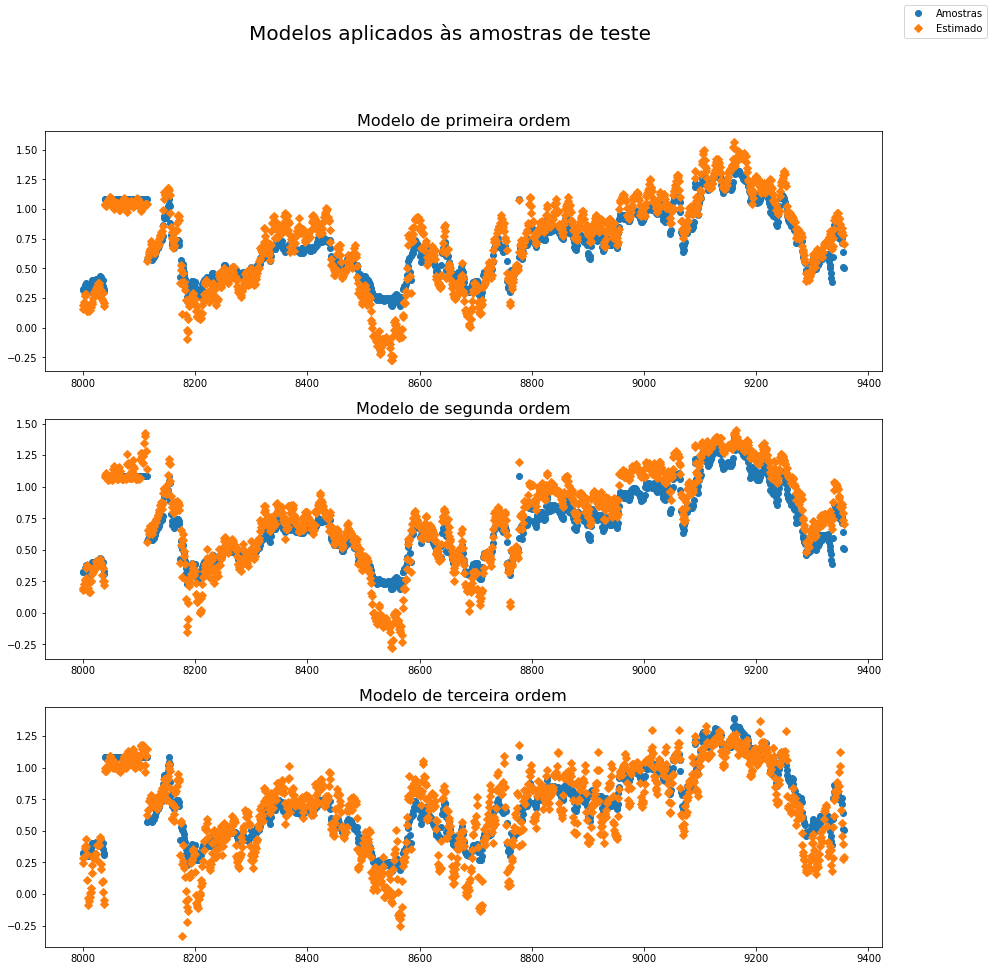

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Modelos aplicados às amostras de teste", fontsize="20")

ax1.set_title("Modelo de primeira ordem", fontsize=16)
ax1.plot(air_test['AH'], "o")
ax1.plot(fx1, "D")

ax2.set_title("Modelo de segunda ordem", fontsize=16)
ax2.plot(air_test['AH'], "o")
ax2.plot(fx2, "D")

ax3.set_title("Modelo de terceira ordem", fontsize=16)
ax3.plot(air_test['AH'], "o", label="Amostras")
ax3.plot(fx3, "D", label="Estimado")

fig.legend()

De acordo com os fatores de determinação de complexidade, o melhor modelo para o conjunto de dados é o polinomial de **segunda ordem**, que obteve o menor valor de QME e o maior de R2. Nenhum dos modelos conseguiu atigir valor de R2 superior a 0,9. Isto significa que nenhum dele foi capaz de se ajustar bem aos dados.

In [ ]:
###################################################
#Índices de desempenho para modelo de segunda ordem
###################################################

#Métrica RMSE
air_train_r = pd.concat([air_train_x2, air_train['AH']], axis=1)
air_train_r = air_train_r.drop(0, axis=1)
rmse2 = rmse(air_train_r, w2)
print("RMSE segunda ordem amostras de treinamento = {}".format(rmse2))
rmse2 = rmse(air_test_x2, w2)
print("RMSE segunda ordem amostras de teste = {}".format(rmse2))

#Métrica MAPE
mape2 = mape(air_train_r, w2)
print("\nMAPE segunda ordem amostras de treinamento = {}".format(mape2))
mape2 = mape(air_test_x2, w2)
print("MAPE segunda ordem amostras de teste = {}".format(mape2))

RMSE segunda ordem amostras de treinamento = 0.0831268931839927
RMSE segunda ordem amostras de teste = 0.13269307209722436

MAPE segunda ordem amostras de treinamento = 0.07150132551735339
MAPE segunda ordem amostras de teste = 0.20230789683452752


Pela análise dos índices RMSE e MAPE percebe-se que o modelo de segunda ordem obteve melhores resultados para a base de treinamento, chegando muito próximo de zero. Porém, o mesmo resultado não foi obtido nas amostras de teste, cujos índices foram superiores, onde conclui-se que o ajuste ocorreu melhor para as amostras de treinamento do que para as de teste. A opção pela seleção aleatória da amostras poderia melhorar o resultado.